# KNN algorithm

An artificial dataset is used to perform the classification. There are two classes 0 and 1. The goal is to classify the data into the two different classes.

### Import packages
The libraries to help deal with data - pandas and numpy along with data visualization packages - matplotlib and seaborn are imported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read data

The data has a target class which takes the value 0 or 1. The other columns are numeric but there is no meaning to it since the data is artificial.

In [2]:
df = pd.read_csv('datasets/dataset.csv')
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


### Standardize data
In KNN, it is important to standardize the variables. The reason being that KNN classifies a test observation by identifying the observations that are nearest to it and if there are any variables with a large scale then it will have an higher effect on the distance between observations. It is done using the scikit learn package. The standard scalar function is imported and an instance of it is created. 

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Next fit the scaler object to the features (data without target class) and using the transform() method the features are transformed to a scaled version.

In [4]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

The scaled features can be viewed in the form of a dataframe which will be used for model building.

In [5]:
df_final = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_final.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


### Splitting the data into training and testing data

The train test split function will be used from the scikit learn package.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

### Choosing the K value
Using the elbow method, the value of K will be chosen. So K values will be looped and for each value the error rate will be calculated. 

In [7]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

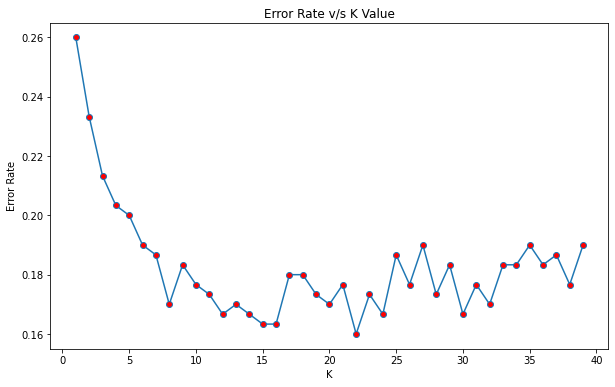

In [8]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,marker='o',markerfacecolor='red')
plt.title('Error Rate v/s K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Using the above graph, the K value can be considered as 30.

### Model building

The model is built by using the KNeighborsClassifier method imported from scikit learn. An object of the KNN function will be created and the number of neighbors which is equal to the K  value obtained above will be mentioned. Then the object is fit on the training data.

In [9]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=30)

### Prediction

In [10]:
pred = knn.predict(X_test)

### Evalutions

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
print(confusion_matrix(y_test,pred))

[[133  34]
 [ 16 117]]


In [13]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       167
           1       0.77      0.88      0.82       133

    accuracy                           0.83       300
   macro avg       0.83      0.84      0.83       300
weighted avg       0.84      0.83      0.83       300

